Loaded ABC history.
Max generation (t): 7
Posterior dataframe head:


name,adhesion,fragment_rate,heading_sigma,init_n_clusters,merge_prob,prolif_rate,speed_meanlog,speed_sdlog
id,,,,,,,,
1403,0.736871,0.003288,0.536013,611.027475,0.696809,0.010365,-0.057910,0.194801
1404,0.578398,0.003126,0.532029,531.009497,0.361227,0.010961,-0.574625,1.095593
1405,0.856200,0.008618,0.617763,584.373714,0.647980,0.010701,-0.031804,0.161758
1406,0.853577,0.008207,0.396116,530.464863,0.599055,0.011410,-0.494483,0.455471
1407,0.919418,0.008202,0.487793,559.262327,0.946522,0.009289,-0.299952,0.455216


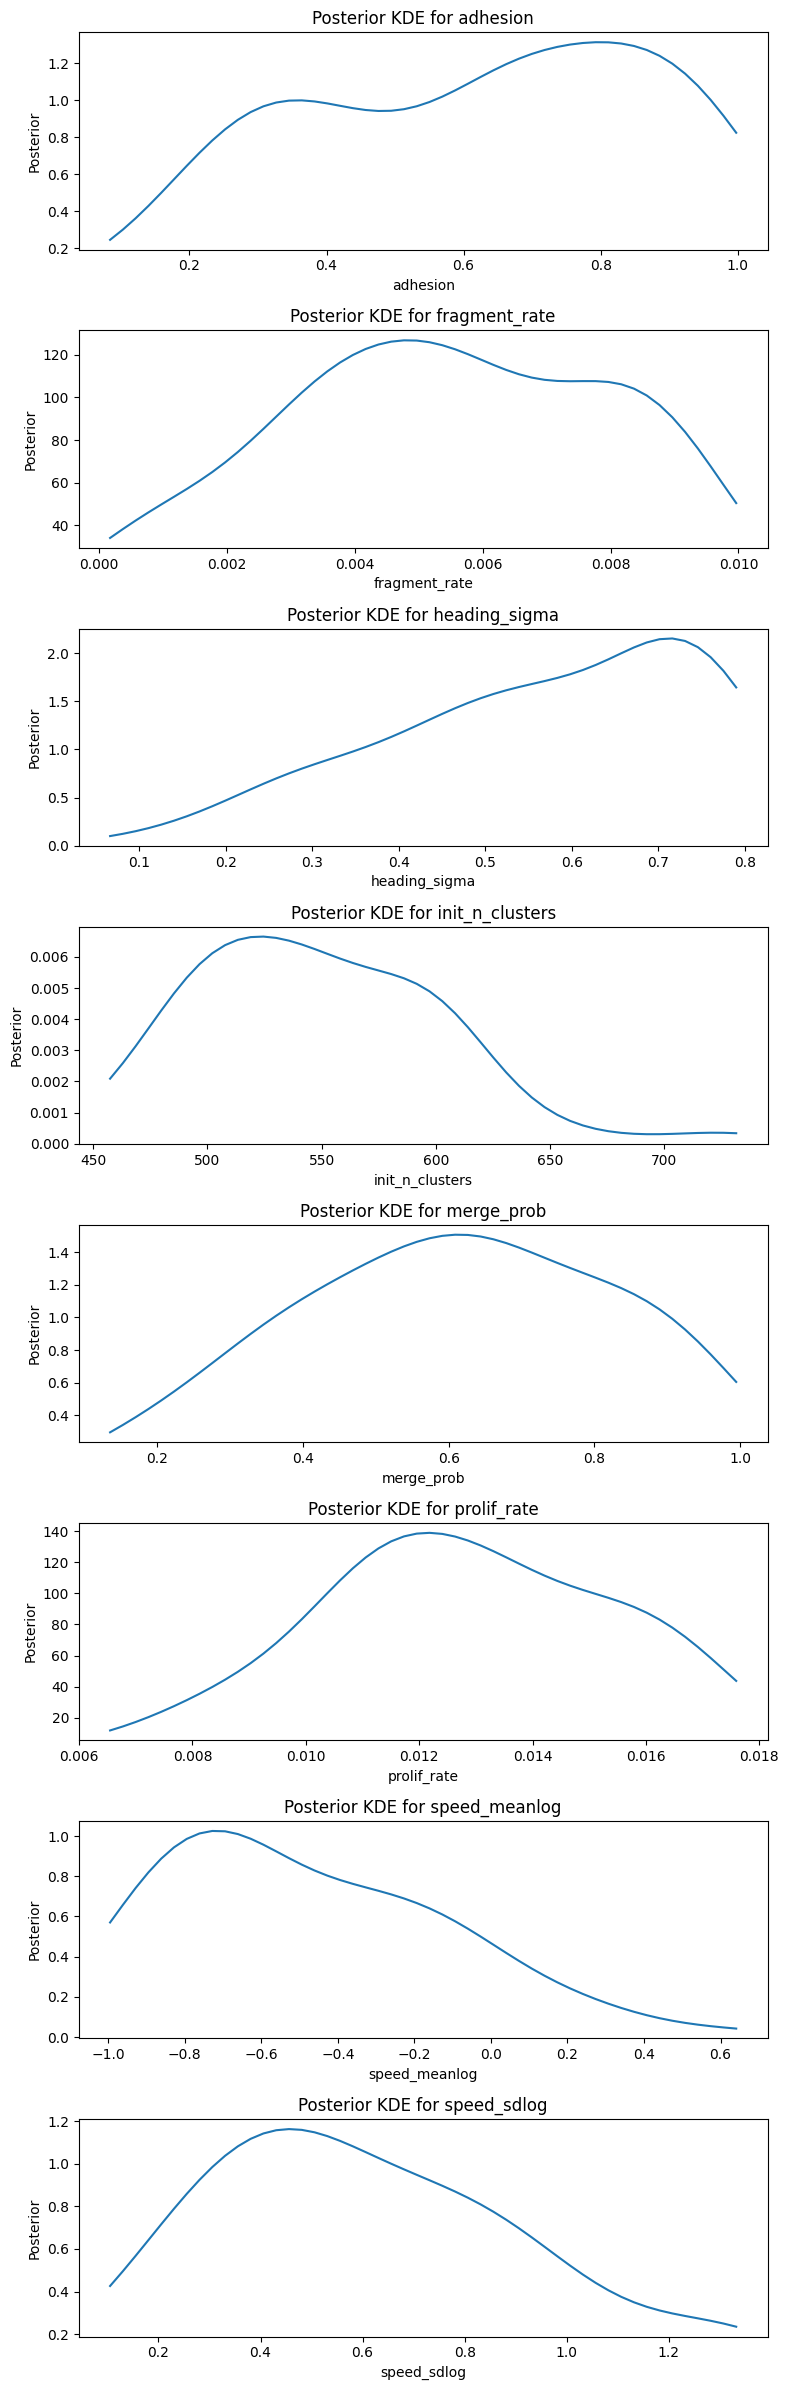

<Figure size 1000x1000 with 0 Axes>

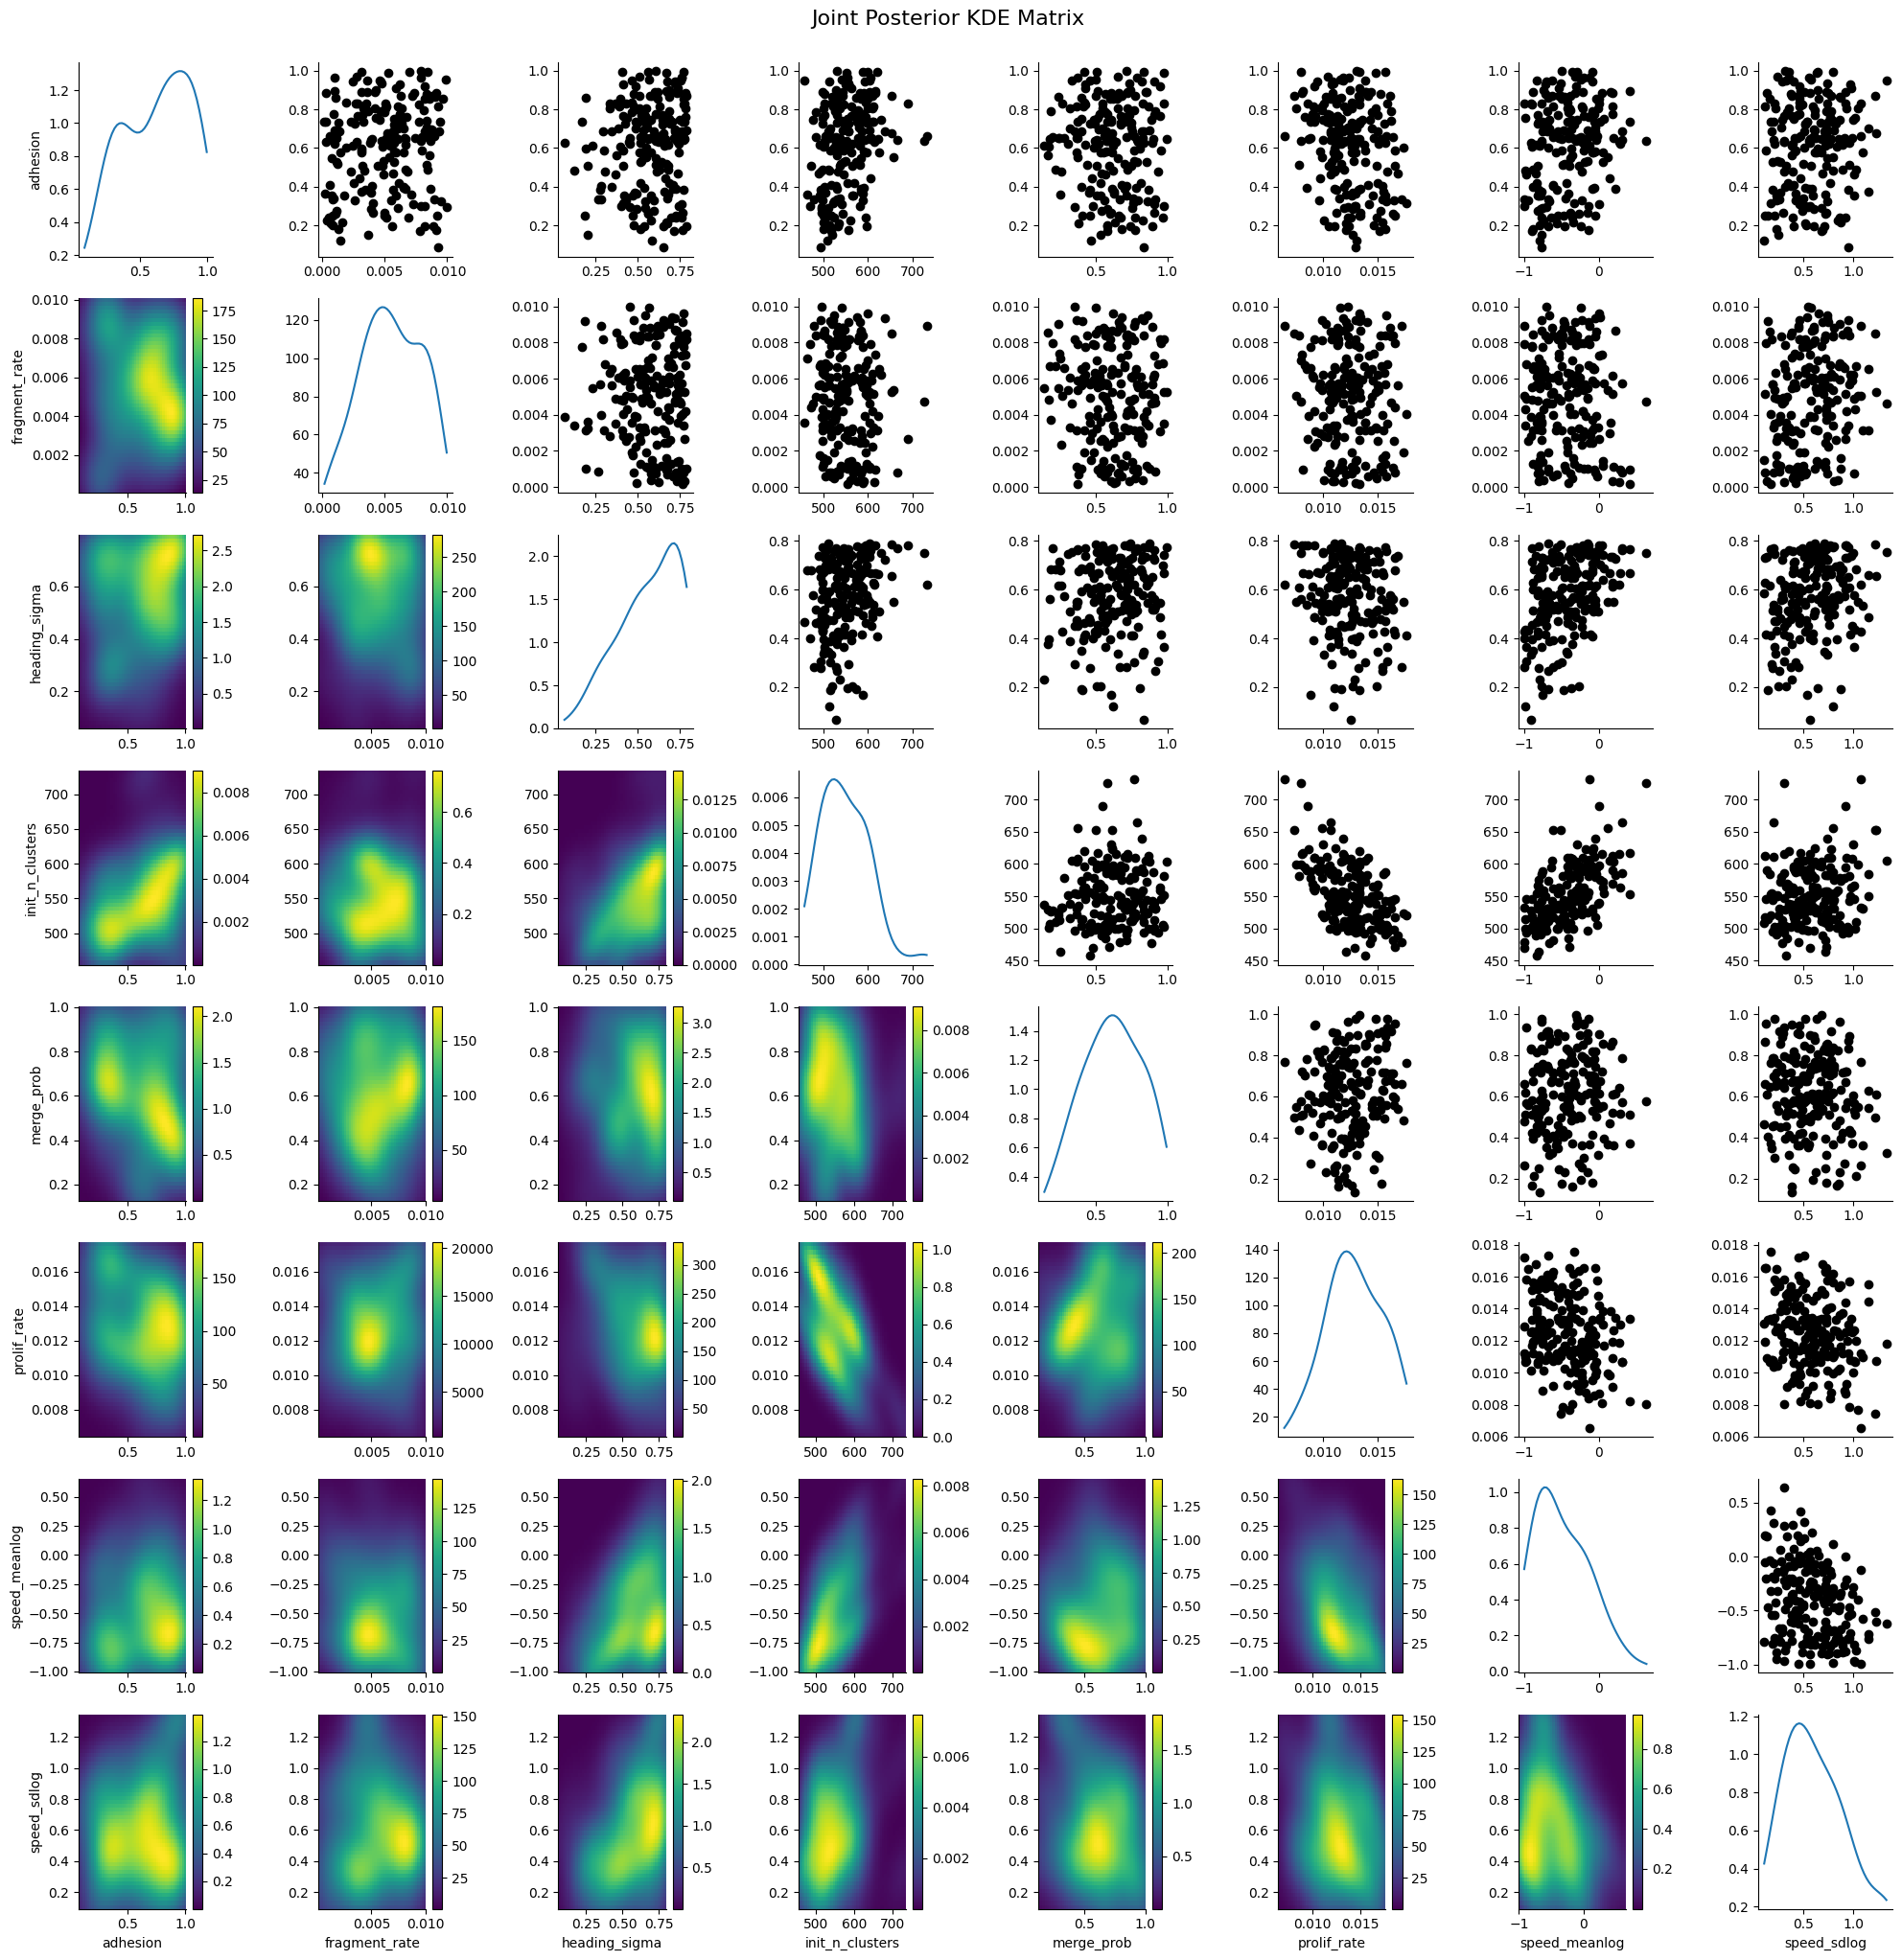

<Figure size 800x400 with 0 Axes>

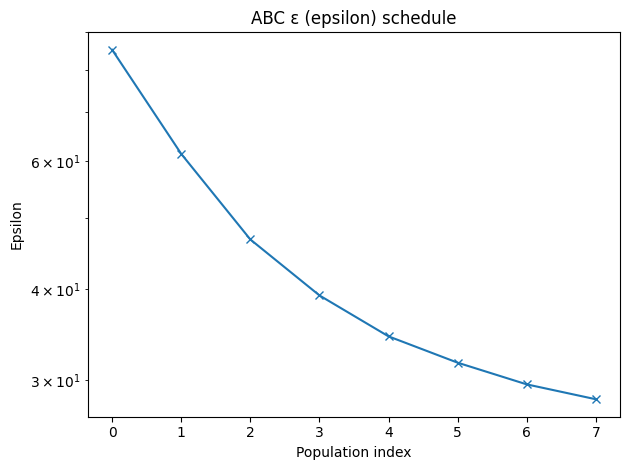

AttributeError: module 'pyabc.visualization' has no attribute 'plot_distances'

<Figure size 800x400 with 0 Axes>

In [1]:

# ================================================================
#  ABC-SMC POSTERIOR ANALYSIS NOTEBOOK
# ================================================================
# This notebook:
#  - loads ABC results from SQLite .db
#  - extracts posterior distributions
#  - plots 1D and 2D KDEs
#  - plots epsilon trajectory
#  - plots distance distribution across generations
#  - performs posterior predictive checks (optional)
# ================================================================

from pyabc import History
import pyabc.visualization as viz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ---------------------------------------------------------------
# Load ABC history
# ---------------------------------------------------------------
# db_path = "sqlite:///results/abc_mahalanobis_no_gr.db"
db_path = "sqlite:///results/abc_15_pop_INV_ABM_ready_summary_persistent_lognorm_seed42_20260117_221654.db"

h = History(db_path)

print("Loaded ABC history.")
print(f"Max generation (t): {h.max_t}")

# ---------------------------------------------------------------
# Extract posterior for final generation
# ---------------------------------------------------------------
df, w = h.get_distribution(m=0, t=h.max_t)
print("Posterior dataframe head:")
display(df.head())

# ---------------------------------------------------------------
# Plot 1D KDE for every parameter in the posterior
# ---------------------------------------------------------------
params = df.columns.tolist()

fig, axes = plt.subplots(len(params), 1, figsize=(8, 3 * len(params)))
if len(params) == 1:
    axes = [axes]  # ensure iterable

for ax, param in zip(axes, params):
    viz.plot_kde_1d(df, w, param, ax=ax)
    ax.set_title(f"Posterior KDE for {param}")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# Plot full parameter correlation matrix
# ---------------------------------------------------------------
plt.figure(figsize=(10, 10))
viz.plot_kde_matrix(df, w)
plt.suptitle("Joint Posterior KDE Matrix", y=1.02, fontsize=16)
plt.show()

# ---------------------------------------------------------------
# Epsilon trajectory across generations
# ---------------------------------------------------------------
plt.figure(figsize=(8, 4))
viz.plot_epsilons(h)
plt.title("ABC ε (epsilon) schedule")
plt.show()

# ---------------------------------------------------------------
# Distance distribution across generations
# ---------------------------------------------------------------
plt.figure(figsize=(8, 4))
viz.plot_distances(h)
plt.title("ABC Distance Distribution per Generation")
plt.show()

# ---------------------------------------------------------------
# Acceptance rate over time
# ---------------------------------------------------------------
plt.figure(figsize=(8, 4))
viz.plot_acceptance_rates(h)
plt.title("Acceptance Rates per Generation")
plt.show()

# ---------------------------------------------------------------
# (Optional) Posterior Predictive Check
#
# For this section, you must:
#   - define a simulation function simulate_model(params)
#   - provide argument total_steps and sample_timesteps
#
# If you supply these, the notebook will:
#   - sample parameters from the posterior
#   - generate trajectories
#   - overlay them with the observed dataset
# ---------------------------------------------------------------

# Example placeholder, replace with your real ABM call
def simulate_model(params):
    """
    Example:
    sim = simulate_timeseries(model_factory, params, ...)
    return sim  # shape (T, K) array
    """
    raise NotImplementedError("Implement simulate_model(params) using your ABM.")

# ---- Uncomment to run PPC once simulate_model is implemented ----
"""
# Number of posterior samples to draw
n_samples = 20
posterior_samples = df.sample(n_samples, weights=w)

# Load observed data
obs = pd.read_csv("observed/INV_ABM_ready_summary.csv")
timesteps = obs["timestep"].astype(int).to_numpy()
obs_data = obs[["S0", "S1", "S2", "NND_med"]].to_numpy()

plt.figure(figsize=(10,6))

# Plot observed trajectories
plt.plot(timesteps, obs_data[:, 0], 'k-', linewidth=2, label="Observed S0")

# Run predictive simulations
for _, row in posterior_samples.iterrows():
    try:
        sim = simulate_model(dict(row))  # convert posterior row → dict
        plt.plot(timesteps, sim[:, 0], color="blue", alpha=0.2)
    except Exception as e:
        print("Simulation error:", e)

plt.title("Posterior Predictive Check (Example for S0)")
plt.xlabel("timestep")
plt.ylabel("S0")
plt.legend()
plt.show()
"""

print("Notebook complete. Inspect plots above.")
